# Exploratory Data 
## Lisa

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import re
import math
import urllib2
import json

In [53]:
all_05_14=pd.read_csv("./tempdata/all_05_14.csv")
all_05_14.head()

,Unnamed: 0,acousticness,analysis_url,artist_discovery,artist_discovery_rank,artist_familiarity,artist_familiarity_rank,artist_hotttnesss,artist_hotttnesss_rank,artist_id,artist_location,artist_name,audio_md5,audio_summary,danceability,duration,energy,id,index,key,liveness,loudness,mode,song_currency,song_currency_rank,song_discovery,song_discovery_rank,song_hotttnesss,song_hotttnesss_rank,song_type,speechiness,tempo,time_signature,title,valence,year,band_singer,ranking,song,songurl,url
0,0,0.091430,http://echonest-analysis.s3.amazonaws.com/TR/e...,0.359701,221738,0.822827,64,0.814542,189,ARKSZW81187B9B695D,"{u'latitude': 40.714269, u'location': u'New Yo...",Mariah Carey,6671e02f970764a0a0cd19a334b62b8a,"{u'time_signature': 5, u'analysis_url': u'http...",0.609242,261.73624,0.616778,SOORURB14D63A4D714,10,11,0.328686,-10.025,0,0.078954,5721,0.000000,NaN,0.542015,2246,"[studio, electric, vocal]",0.267907,123.507,5,We Belong Together,0.651922,2005,Mariah Carey,1,We Belong Together,/wiki/We_Belong_Together_(Mariah_Carey_song),/wiki/Mariah_Carey
1,1,0.388179,http://echonest-analysis.s3.amazonaws.com/TR/v...,0.403619,109354,0.775424,189,0.800312,238,ARVBRGZ1187FB4675A,"{u'latitude': 33.870292, u'location': u'Fuller...",Gwen Stefani,NaN,"{u'time_signature': 4, u'analysis_url': u'http...",0.915552,199.85333,0.910087,SONVOXZ144F507BAA2,30,10,0.024326,-2.116,0,0.068706,7080,0.005473,654041,0.588830,878,"[studio, electric, vocal]",0.096720,110.039,4,Hollaback Girl,0.897375,2005,Gwen Stefani,2,Hollaback Girl,/wiki/Hollaback_Girl,/wiki/Gwen_Stefani
2,2,0.126426,http://echonest-analysis.s3.amazonaws.com/TR/s...,0.353693,235210,0.689165,847,0.579688,6282,AR9BS5O1187FB5432D,"{u'latitude': 39.296536, u'location': u'Baltim...",Mario,NaN,"{u'time_signature': 4, u'analysis_url': u'http...",0.649943,224.08000,0.680246,SOPPTQN12A8C13FC2A,50,7,0.114059,-6.448,0,0.060272,9432,0.006611,543279,0.506118,4391,"[studio, electric, vocal]",0.031894,94.556,4,Let Me Love You,0.509154,2005,Mario,3,Let Me Love You,/wiki/Let_Me_Love_You_(Mario_song),/wiki/Mario_(entertainer)
3,3,0.388041,http://echonest-analysis.s3.amazonaws.com/TR/K...,0.372455,185958,0.778674,179,0.744667,647,ARJGIOD1187B9AE920,"{u'latitude': 32.492683, u'location': u'Burles...",Kelly Clarkson,NaN,"{u'time_signature': 4, u'analysis_url': u'http...",0.623261,203.22667,0.585006,SOSIAUZ144BD67C6D8,70,9,0.085401,-3.438,0,0.065053,7949,0.000000,NaN,0.491581,5717,"[studio, electric, vocal]",0.032859,125.741,4,Since U Been Gone,0.151089,2005,Kelly Clarkson,4,Since U Been Gone,/wiki/Since_U_Been_Gone,/wiki/Kelly_Clarkson
4,4,0.131584,http://echonest-analysis.s3.amazonaws.com/TR/l...,0.411970,92866,0.753892,280,0.775090,382,ARS2P621187FB37B82,"{u'latitude': 33.844371, u'location': u'Atlant...",Ciara,d658ace26f2fc5b38c120c5e1925f374,"{u'time_signature': 4, u'analysis_url': u'http...",0.757638,282.17424,0.875178,SOGIXPY144BD39B9C9,90,7,0.050422,-4.890,0,0.008956,71596,0.002146,1529531,0.309091,133243,"[studio, electric]",0.057552,125.997,4,"1, 2 Step",0.972513,2005,Ciara,5,"1, 2 Step","/wiki/1,_2_Step",/wiki/Ciara


In [63]:
print list(all_05_14.columns.values)

variables = ['acousticness','artist_discovery','artist_discovery_rank','artist_familiarity', 'artist_familiarity_rank',
             'artist_hotttnesss','artist_hotttnesss_rank','duration','danceability', 'energy','key','liveness','loudness','mode',
             'song_currency','song_currency_rank','song_discovery','song_discovery_rank','song_hotttnesss',
             'song_hotttnesss_rank','speechiness','tempo','time_signature','valence']

len(variables)

['Unnamed: 0', 'acousticness', 'analysis_url', 'artist_discovery', 'artist_discovery_rank', 'artist_familiarity', 'artist_familiarity_rank', 'artist_hotttnesss', 'artist_hotttnesss_rank', 'artist_id', 'artist_location', 'artist_name', 'audio_md5', 'audio_summary', 'danceability', 'duration', 'energy', 'id', 'index', 'key', 'liveness', 'loudness', 'mode', 'song_currency', 'song_currency_rank', 'song_discovery', 'song_discovery_rank', 'song_hotttnesss', 'song_hotttnesss_rank', 'song_type', 'speechiness', 'tempo', 'time_signature', 'title', 'valence', 'year', 'band_singer', 'ranking', 'song', 'songurl', 'url']


24

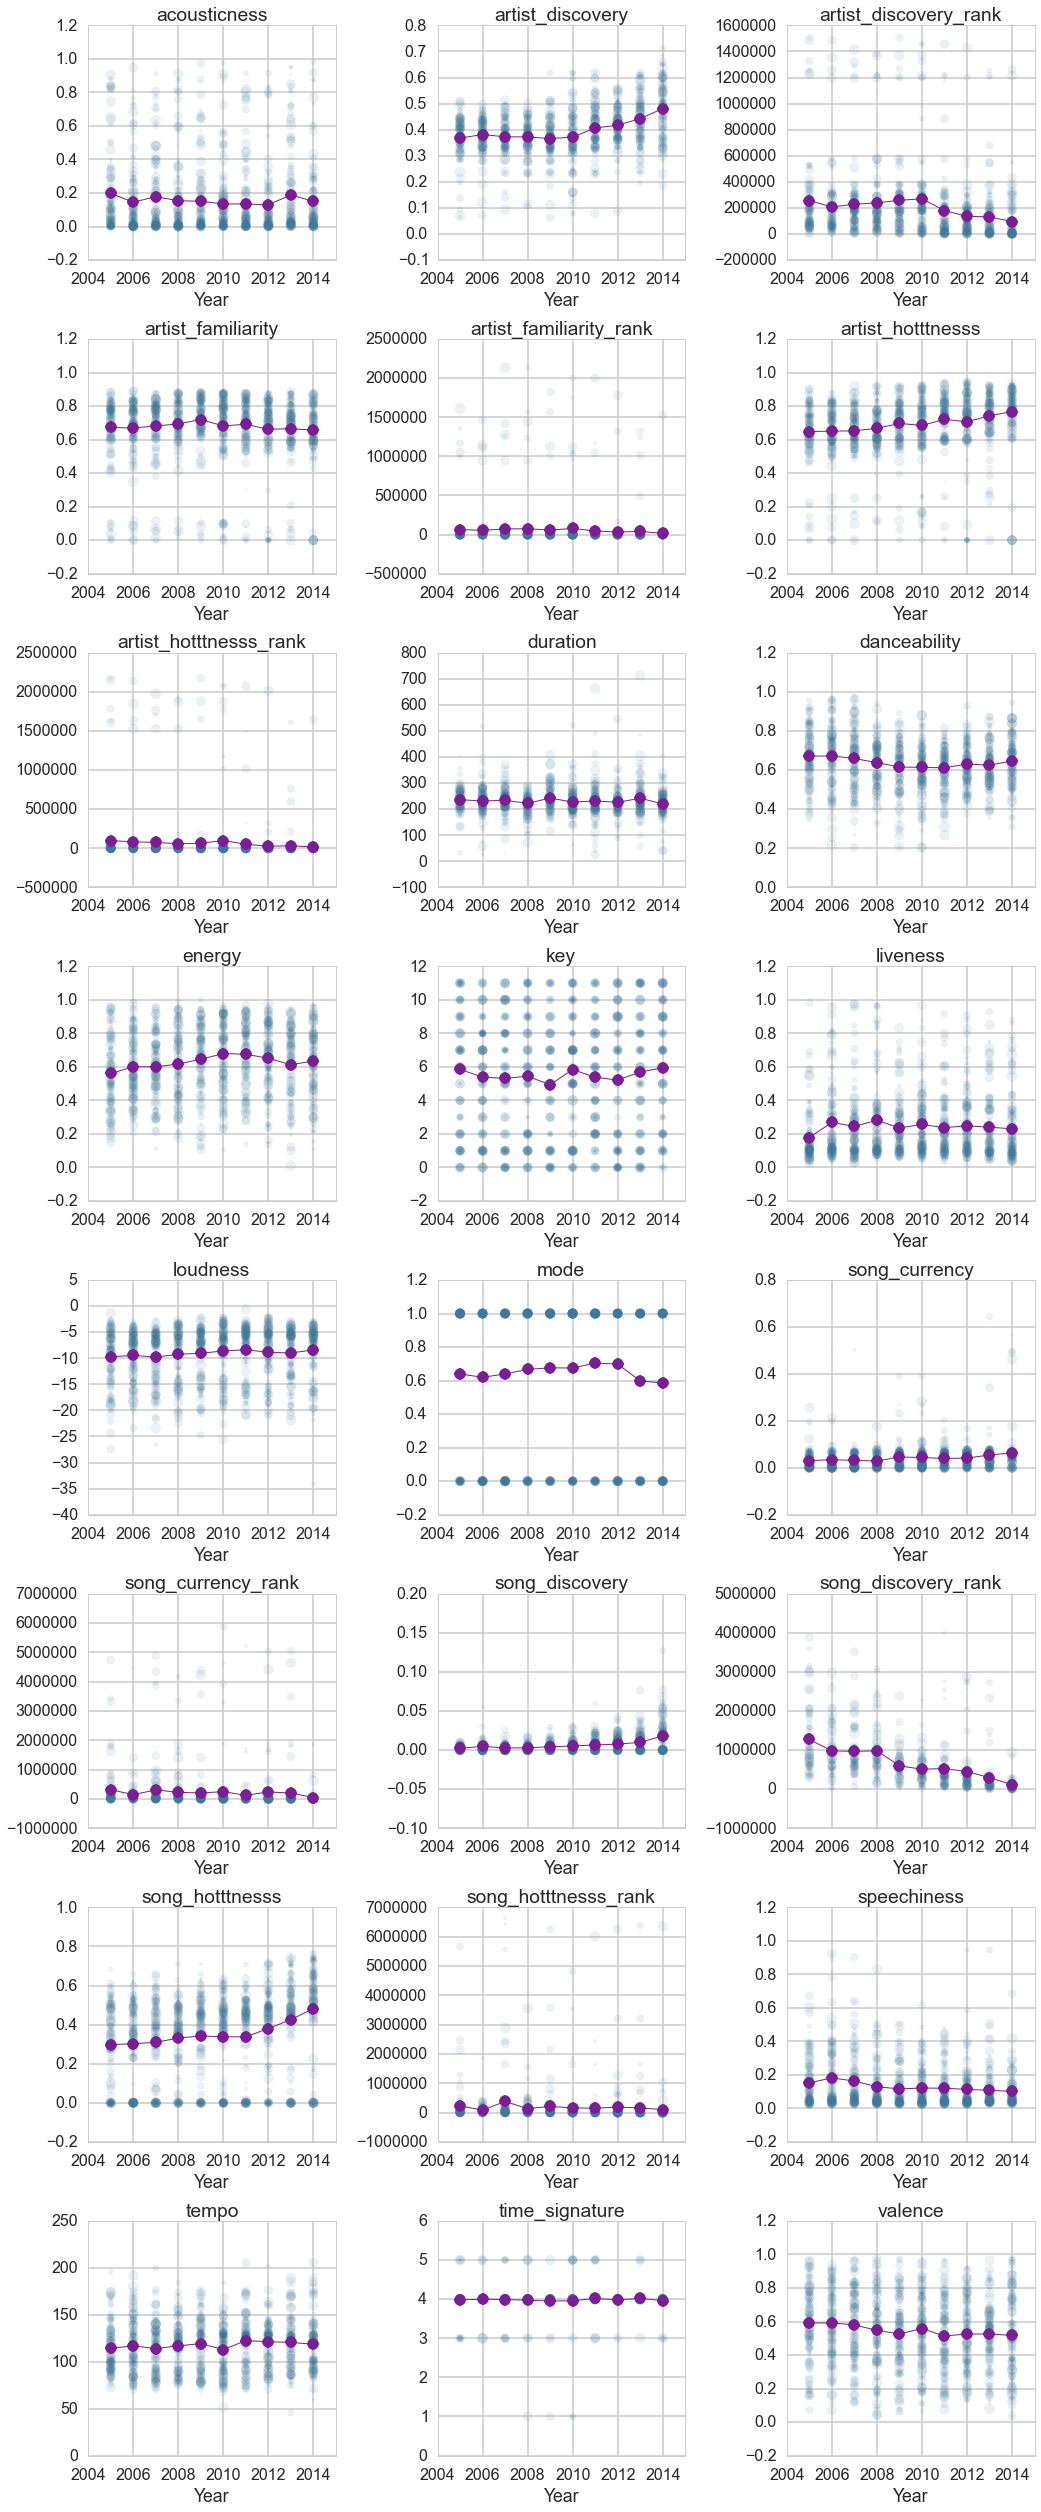

In [64]:
# HW1
# my code

# create a 8x3 grid of plots.
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(15, 35), tight_layout = True)
fig.subplots_adjust(hspace=3, wspace = 2)

for ax, var in zip(axes.ravel(), variables):
    ax.set_xlim([2004,2015])
    # ax.set_ylim([0,100])
    
    # plotting the scatter plot
#     year2 = np.repeat(year, len(all_05_14), axis=0)
#     ax.plot(all_05_14["year"], all_05_14[var], marker='o', linestyle='', color = "#407899", alpha=.1, lw = 1)
    ax.scatter(all_05_14["year"], all_05_14[var],marker='o', color = "#407899", alpha=.1, s = all_05_14["ranking"])

#     for year, group in genreinfo[genre]['rankingseries']:
#         year2 = np.repeat(year, len(group), axis=0)
#         ax.plot(year2, group, marker='o', linestyle='', color = "#407899", alpha=.1, lw = 1)

    # plotting the averages
    ax.plot(all_05_14["year"].unique(), all_05_14.groupby("year")[var].mean(), 
            'o-', color='#791E94', lw=1, label='Decade Average')
#     for year in all_05_14.year.unique():
#         sub = all_05_14[all_05_14.year == year]
#         ax.plot(year, sub[var].mean(), 'o-',
#                 color='#791E94', lw=1, label='Decade Average')

    # plotting the bands
#     lower = np.array([])
#     higher = np.array([])
#     for mean, std in zip(genreinfo[genre]["meanseries"].values, genreinfo[genre]["stdseries"].values):

#         if math.isnan(std) == True:
#             lower = np.append(lower, 0) 
#             higher = np.append(higher, 100)
#         else:
#             lower = np.append(lower, mean - std) 
#             higher = np.append(higher, mean + std)

#     ax.fill_between(genreinfo[genre]['meanseries'].index, higher, lower,
#                     color='#ECAFFF', alpha=.3)

#     ax.annotate((genre[6:]).replace("_", " "), xy=(1990, 100), fontsize=18)
    ax.set_title(var)

    ax.set_xlabel("Year")
#     ax.set_ylabel('Rank')

Because change is not noticeable in these past ten years, it appears that we do not have to take time into account.